<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data to Pandas DataFrame

In [6]:
df = pd.read_csv('real-estate.csv')

## Droping Unnecessary Columns

In [7]:
unnecessary = ['No', 'X1 transaction date']
df = df.drop(columns=unnecessary)

## Splitting Data to Train and Test

In [9]:
X = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Visualizing Data Distribution and Correlation

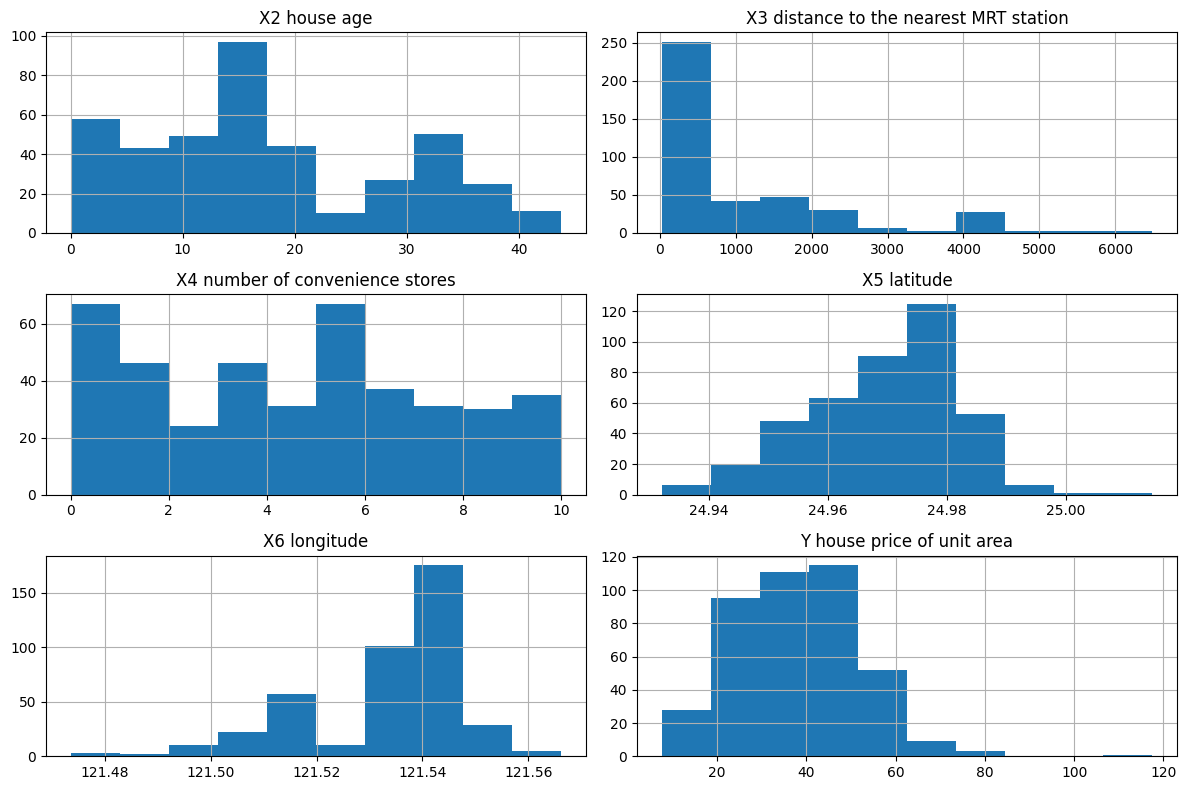

In [10]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

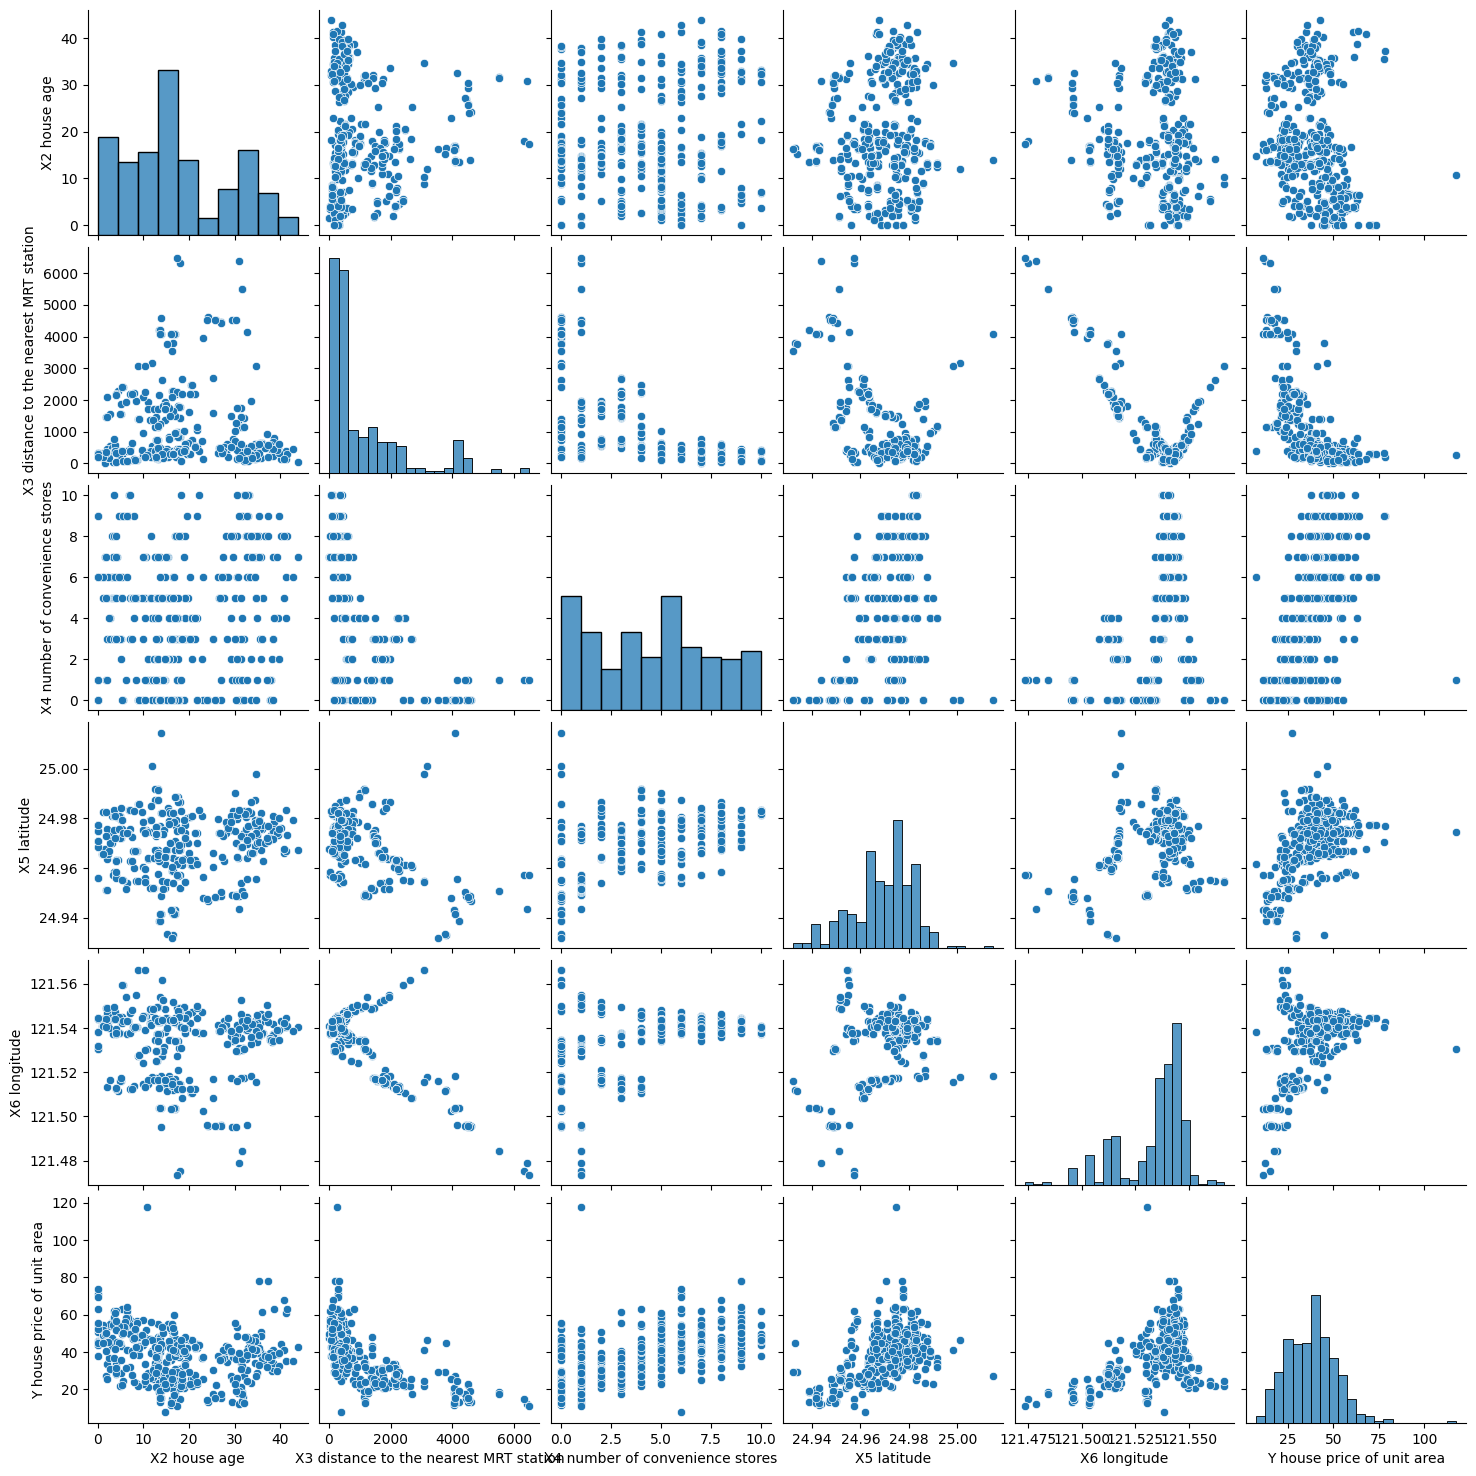

In [11]:
sns.pairplot(df)
plt.show()

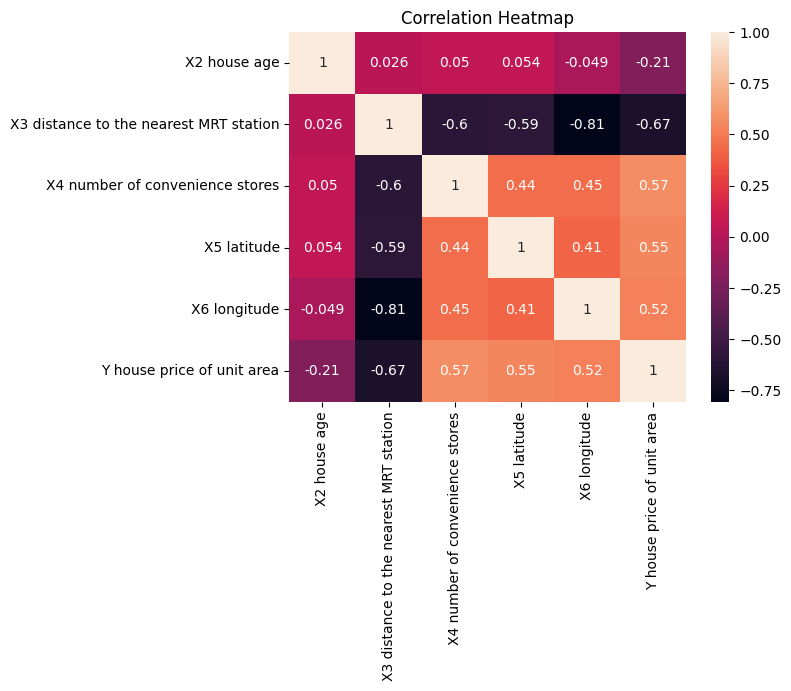

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def mseAndR2(test, pred):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)

    print(f"MSE: {mse},\tR-squared: {r2}")

## Linear Regression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mseAndR2(y_test, y_pred)

MSE: 54.58094520086212,	R-squared: 0.6746481382828176


## Polynomial Regression

In [16]:

poly = PolynomialFeatures(2)
X_train_2D = poly.fit_transform(X_train)
X_test_2D = poly.transform(X_test)

linear2D = LinearRegression()
linear2D.fit(X_train_2D, y_train)
y_pred1 = linear2D.predict(X_test_2D)
print("linear 2d:")
mseAndR2(y_test, y_pred1)

linear 2d:
MSE: 41.850482438547026,	R-squared: 0.7505332250103933


## Ridge Regression

In [18]:
ridge2D = Ridge(alpha=1.0)
ridge2D.fit(X_train_2D, y_train)
y_pred1 = ridge2D.predict(X_test_2D)
print("Ridge d2:")
mseAndR2(y_test, y_pred1)

Ridge d2:
MSE: 41.77960040677197,	R-squared: 0.7509557461103018


## Lasso Regression

In [19]:
lasso2D = Lasso(alpha=1.0)
lasso2D.fit(X_train_2D, y_train)
y_pred1 = lasso2D.predict(X_test_2D)
print("Lasso d2:")
mseAndR2(y_test, y_pred1)

Lasso d2:
MSE: 49.26467698158054,	R-squared: 0.7063379112643202


## Elastic Net Regression

In [20]:
elastic2D = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic2D.fit(X_train_2D, y_train)
y_pred1 = elastic2D.predict(X_test_2D)
print("Elastic d2:")
mseAndR2(y_test, y_pred1)

Elastic d2:
MSE: 54.74928828542185,	R-squared: 0.6736446610479117


## XGBoost Regression

In [21]:
xgb2D = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42)
xgb2D.fit(X_train_2D, y_train)
y_pred1 = xgb2D.predict(X_test_2D)
print("XGBoost d2:")
mseAndR2(y_test, y_pred1)

XGBoost d2:
MSE: 29.646061251007502,	R-squared: 0.8232826275708293


# Assosiation Rules

In [22]:
# 0. Import Libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Data Loading
df = pd.read_csv("grocery.csv", names=['transactions'])

# 2. Preprocess Data
df['transactions'] = df['transactions'].str.split(',')
transactions = df['transactions'].tolist()

# 3. Apply TransactionEncoder
te = TransactionEncoder()
teArray = te.fit(transactions).transform(transactions)
df2 = pd.DataFrame(teArray, columns=te.columns_)

# 4. Generate Frequent Itemsets
minsup = 0.2
frequents = apriori(df2, min_support=minsup, use_colnames=True)

# 5. Generate Association Rules
minconf = 0.6
rules = association_rules(frequents, metric='confidence', min_threshold=minconf)

# 6. Display Rules
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000
